# Sentence Classification
Sentence classification is an NLP task which have several applications including document classification, spam filtering, and sentiment analysis. 
It is the task of giving a label to a sentence according to its meaning. 

Some classic and neural network methods for sentence classification have been implemented in the following.

The dataset which is used is the *amazon-massive-dataset* which can be downloaded from [here](https://github.com/alexa/massive). The target dataset is in Persian.

At first the dataset has been downloaded and loaded into a DataFrame.

In [2]:
!curl https://amazon-massive-nlu-dataset.s3.amazonaws.com/amazon-massive-dataset-1.0.tar.gz --output amazon-massive-dataset-1.0.tar.gz
!tar -xzvf amazon-massive-dataset-1.0.tar.gz
!tree 1.0

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 37.6M  100 37.6M    0     0  35.0M      0  0:00:01  0:00:01 --:--:-- 35.0M
1.0/
1.0/CITATION.md
1.0/NOTICE.md
1.0/data/
1.0/data/mn-MN.jsonl
1.0/data/af-ZA.jsonl
1.0/data/el-GR.jsonl
1.0/data/ta-IN.jsonl
1.0/data/ar-SA.jsonl
1.0/data/ur-PK.jsonl
1.0/data/pl-PL.jsonl
1.0/data/ko-KR.jsonl
1.0/data/az-AZ.jsonl
1.0/data/da-DK.jsonl
1.0/data/kn-IN.jsonl
1.0/data/tl-PH.jsonl
1.0/data/is-IS.jsonl
1.0/data/lv-LV.jsonl
1.0/data/it-IT.jsonl
1.0/data/es-ES.jsonl
1.0/data/fr-FR.jsonl
1.0/data/ml-IN.jsonl
1.0/data/km-KH.jsonl
1.0/data/fa-IR.jsonl
1.0/data/sw-KE.jsonl
1.0/data/en-US.jsonl
1.0/data/tr-TR.jsonl
1.0/data/bn-BD.jsonl
1.0/data/he-IL.jsonl
1.0/data/te-IN.jsonl
1.0/data/pt-PT.jsonl
1.0/data/ka-GE.jsonl
1.0/data/ja-JP.jsonl
1.0/data/id-ID.jsonl
1.0/data/ru-RU.jsonl
1.0/data/hy-AM.jsonl
1.0/data/nb-NO.jsonl
1.0/data/ms-MY.jsonl
1.0/

In [3]:
import pandas as pd
import json

# Open the JSONL file and read each line as a separate JSON object
with open('./1.0/data/fa-IR.jsonl', 'r') as f:
    data = [json.loads(line) for line in f]

# Convert the list of JSON objects into a pandas DataFrame
df = pd.DataFrame(data)

### Analyzing data

In [4]:
train_count = len(df[df['partition'] == 'train'])
print("number of train data in dataset:", train_count)

test_count = len(df[df['partition'] == 'test'])
print("number of test data in dataset:", test_count)

number of train data in dataset: 11514
number of test data in dataset: 2974


In [5]:
num_scenarios = df['scenario'].nunique()
print('number of different scenarios in dataframe:', num_scenarios)

number of different scenarios in dataframe: 18


In [6]:
counts = df['scenario'].value_counts()
print("how many records each scenario has:")
print(counts)

how many records each scenario has:
calendar          2370
play              2024
qa                1685
email             1381
iot               1107
general            963
weather            855
transport          805
lists              793
news               709
recommendation     596
datetime           578
social             565
alarm              550
music              469
audio              387
takeaway           358
cooking            326
Name: scenario, dtype: int64


The dataset contains both train and test data which is defined by the 'partition' attribute. Train and test data and their labels have became seperated.

In [7]:
df_copy = df.copy()

# Get rows where 'partition' is 'train'
train_df = df_copy[df_copy['partition'] == 'train']
train_data = train_df['utt']
train_labels = train_df['scenario']

# Get rows where 'partition' is 'train'
test_df =  df_copy[df_copy['partition'] == 'test']
test_data = test_df['utt']
test_labels = test_df['scenario']

In [9]:
train_value_counts = train_df['scenario'].value_counts()
test_value_counts = test_df['scenario'].value_counts()

print("number of records for each scenario in train data:")
print(train_value_counts, '\n')
print("number of records of each scenario in test data:")
print(test_value_counts)

number of records for each scenario in train data:
calendar          1688
play              1377
qa                1183
email              953
iot                769
general            652
weather            573
transport          571
lists              539
news               503
recommendation     433
datetime           402
social             391
alarm              390
music              332
audio              290
takeaway           257
cooking            211
Name: scenario, dtype: int64 

number of records of each scenario in test data:
calendar          402
play              387
qa                288
email             271
iot               220
general           189
weather           156
lists             142
transport         124
news              124
social            106
datetime          103
alarm              96
recommendation     94
music              81
cooking            72
audio              62
takeaway           57
Name: scenario, dtype: int64


'sklearn' is the library which is going to be used. It provides so many classification methods

For doing the classification task, each sentence must be converted to a numerical representation. There are several ways to do that. Here, the TF-IDF method is being used for six first methods. 

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score


# Vectorize the text data using TfidfVectorizer
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(train_data)
test_vectors = vectorizer.transform(test_data)

In the following, six classification methods are implemented using the 'sklearn' library and the accuracy of each one is calculated.

For each method, the corresponding class has been imported and instantiated. The fit method learns the model with train vectors and labels.

In [11]:
# To compare the accuracy of different models
models_accuracy = {}  

###1. Naive Bayes


In [12]:
from sklearn.naive_bayes import MultinomialNB
# Train a Multinomial Naive Bayes classifier on the training data
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(train_vectors, train_labels)

# Predict labels for the test data
naive_bayes_predictions = naive_bayes_classifier.predict(test_vectors)

# Calculate accuracy score
naive_bayes_accuracy = accuracy_score(test_labels, naive_bayes_predictions)
print("Naive Bayes Accuracy:", naive_bayes_accuracy)
models_accuracy['naive_bayes'] = naive_bayes_accuracy

Naive Bayes Accuracy: 0.7585743106926698


The accuracy of this method is 75% which is good but can be improved.

Check if the model can predict the label of a new sentence:

In [13]:
new_sentence = "دمای هوا در تهران"
new_vector = vectorizer.transform([new_sentence])

# Predict the label for the new sentence
predicted_label = naive_bayes_classifier.predict(new_vector)[0]

print("The predicted label for the new sentence is:", predicted_label)

The predicted label for the new sentence is: weather


###2. SVM


In [14]:
from sklearn.svm import LinearSVC
# Train a Linear Support Vector Machine (SVM) classifier on the training data
svm_classifier = LinearSVC()
svm_classifier.fit(train_vectors, train_labels)

# Predict labels for the test data
svm_predictions = svm_classifier.predict(test_vectors)

# Calculate accuracy score
svm_accuracy = accuracy_score(test_labels, svm_predictions)
print("SVM Accuracy:", svm_accuracy)
models_accuracy['svm'] = svm_accuracy

SVM Accuracy: 0.8887020847343645


In [15]:
new_sentence = "دمای هوا در تهران"
new_vector = vectorizer.transform([new_sentence])

# Predict the label for the new sentence
predicted_label = svm_classifier.predict(new_vector)[0]

print("The predicted label for the new sentence is:", predicted_label)

The predicted label for the new sentence is: weather


###3. Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
# Train a Decision Tree classifier on the training data
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(train_vectors, train_labels)

# Predict labels for the test data
dt_predictions = dt_classifier.predict(test_vectors)

# Calculate accuracy score
dt_accuracy = accuracy_score(test_labels, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)
models_accuracy['decision_tree'] = dt_accuracy

Decision Tree Accuracy: 0.7723604572965703


###4. Stochastic Gradient Descent

In [17]:
from sklearn.linear_model import SGDClassifier
# Train a Stochastic Gradient Descent classifier on the training data
sgdc_classifier = SGDClassifier()
sgdc_classifier.fit(train_vectors, train_labels)

# Predict labels for the test data
sgdc_predictions = sgdc_classifier.predict(test_vectors)

# Calculate accuracy score
sgdc_accuracy = accuracy_score(test_labels, sgdc_predictions)
print("Stochastic Gradient Descent Accuracy:", sgdc_accuracy)
models_accuracy['stochastic_gradient_descent'] = sgdc_accuracy

Stochastic Gradient Descent Accuracy: 0.8883658372562205


###5. Nearest Neighbors



In [18]:
from sklearn.neighbors import NearestNeighbors
# Train a Nearest Neighbors classifier on the training data
nn_classifier = SGDClassifier()
nn_classifier.fit(train_vectors, train_labels)

# Predict labels for the test data
nn_predictions = nn_classifier.predict(test_vectors)

# Calculate accuracy score
nn_accuracy = accuracy_score(test_labels, nn_predictions)
print("Nearest Neighbors Accuracy:", nn_accuracy)
models_accuracy['nearest_neighbors'] = nn_accuracy

Nearest Neighbors Accuracy: 0.8887020847343645


###6. Multi-layer Perceptron
using the MLPClassifier of the 'sklearn' library

In [19]:
from sklearn.neural_network import MLPClassifier
# Train an MLP classifier on the training data
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50))
mlp_classifier.fit(train_vectors, train_labels)

# Predict labels for the test data
mlp_predictions = mlp_classifier.predict(test_vectors)

# Calculate accuracy score
mlp_accuracy = accuracy_score(test_labels, mlp_predictions)
print("Multi-layer Perceptron Accuracy:", mlp_accuracy)
models_accuracy['multi_layer_perceptron'] = mlp_accuracy

Multi-layer Perceptron Accuracy: 0.8584398117014123


Increasing the size of hidden layer may increase the accuracy and computation time, but too much increasing may lead to overfitting and decreasing the accuracy.


###7. A Deep Neural Network

To easy run the cell and see the result, all importing and data loading has been implemented in one place.

In [20]:
import pandas as pd
import numpy as np
import json
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Open the JSONL file and read each line as a separate JSON object
with open('./1.0/data/fa-IR.jsonl', 'r') as f:
    data = [json.loads(line) for line in f]

# Convert the list of JSON objects into a pandas DataFrame
df = pd.DataFrame(data)

# Split into train and test data
train_data = df[df['partition'] == 'train']
test_data = df[df['partition'] == 'test']

# Preprocess the text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_data['utt'])
X_train = tokenizer.texts_to_sequences(train_data['utt'])
X_test = tokenizer.texts_to_sequences(test_data['utt'])
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

# Convert string labels to numeric labels
label_map = {label: i for i, label in enumerate(train_data['scenario'].unique())}
y_train = np.array([label_map[label] for label in train_data['scenario']])
y_test = np.array([label_map[label] for label in test_data['scenario']])

# Define the model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=50, input_length=100))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_map), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

# Evaluate the model
loss, dnn_accuracy = model.evaluate(X_test, y_test)
print(' Deep Neural Network accuracy:', dnn_accuracy)
models_accuracy['deep_nn'] = dnn_accuracy

Epoch 1/10
180/180 [==============================] - 6s 30ms/step - loss: 2.5235 - accuracy: 0.2350 - val_loss: 2.0140 - val_accuracy: 0.3988
Epoch 2/10
180/180 [==============================] - 4s 22ms/step - loss: 1.6528 - accuracy: 0.5218 - val_loss: 1.1247 - val_accuracy: 0.6927
Epoch 3/10
180/180 [==============================] - 4s 22ms/step - loss: 0.8717 - accuracy: 0.7631 - val_loss: 0.6365 - val_accuracy: 0.8299
Epoch 4/10
180/180 [==============================] - 5s 27ms/step - loss: 0.4667 - accuracy: 0.8788 - val_loss: 0.5141 - val_accuracy: 0.8618
Epoch 5/10
180/180 [==============================] - 4s 22ms/step - loss: 0.2931 - accuracy: 0.9268 - val_loss: 0.4987 - val_accuracy: 0.8658
Epoch 6/10
180/180 [==============================] - 4s 22ms/step - loss: 0.1993 - accuracy: 0.9510 - val_loss: 0.4906 - val_accuracy: 0.8702
Epoch 7/10
180/180 [==============================] - 5s 28ms/step - loss: 0.1453 - accuracy: 0.9663 - val_loss: 0.5020 - val_accuracy: 0.8679

In [21]:
# Preprocess the new sentence
new_sentence = "دمای هوا در تهران"
new_sequence = tokenizer.texts_to_sequences([new_sentence])
new_padded_sequence = pad_sequences(new_sequence, maxlen=100)

# Use the model to make a prediction on the new sentence
predicted_probabilities = model.predict(new_padded_sequence)
predicted_label_index = np.argmax(predicted_probabilities)
predicted_label = list(label_map.keys())[list(label_map.values()).index(predicted_label_index)]
print(predicted_label)

1/1 [==============================] - 0s 102ms/step
weather


### 8. CNN
Convolutional Neural Network (CNN) is a type of neural network wich is applicapable in NLP tasks. 

Coming next, a CNN model with an embedding layer, a 1D convolutional layer, and a dense output layer has been built using keras library. It is an open-source library that provides a Python interface for artificial neural networks. It has many methods that facilitate the process of building and training the CNN.

In [23]:
import pandas as pd
import numpy as np
import tensorflow as tf
import json
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder


# Open the JSONL file and read each line as a separate JSON object
with open('./1.0/data/fa-IR.jsonl', 'r') as f:
    data = [json.loads(line) for line in f]

# Convert the list of JSON objects into a pandas DataFrame
df = pd.DataFrame(data)

# Split into train and test data
train_data = df[df['partition'] == 'train']
test_data = df[df['partition'] == 'test']

# Preprocess the text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_data['utt'])
X_train = tokenizer.texts_to_sequences(train_data['utt'])
X_test = tokenizer.texts_to_sequences(test_data['utt'])
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

# Convert string labels to numeric labels in another way
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test= encoder.fit_transform(y_test)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=50, input_length=100))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_map), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

# Evaluate the model
loss, cnn_accuracy = model.evaluate(X_test, y_test)
print('CNN Accuracy:', cnn_accuracy)
models_accuracy['cnn'] = cnn_accuracy


# Preprocess the new sentence
new_sentence = "دمای هوا در تهران"
new_sequence = tokenizer.texts_to_sequences([new_sentence])
new_padded_sequence = pad_sequences(new_sequence, maxlen=100)

# Use the model to make a prediction on the new sentence
predicted_probabilities = model.predict(new_padded_sequence)
predicted_label_index = np.argmax(predicted_probabilities)
predicted_label = list(label_map.keys())[list(label_map.values()).index(predicted_label_index)]
print(predicted_label)

Epoch 1/10
180/180 [==============================] - 9s 41ms/step - loss: 2.4046 - accuracy: 0.2559 - val_loss: 1.7937 - val_accuracy: 0.4721
Epoch 2/10
180/180 [==============================] - 6s 34ms/step - loss: 1.3964 - accuracy: 0.5724 - val_loss: 0.9646 - val_accuracy: 0.7139
Epoch 3/10
180/180 [==============================] - 7s 40ms/step - loss: 0.7807 - accuracy: 0.7670 - val_loss: 0.6847 - val_accuracy: 0.8127
Epoch 4/10
180/180 [==============================] - 6s 34ms/step - loss: 0.4823 - accuracy: 0.8695 - val_loss: 0.6247 - val_accuracy: 0.8329
Epoch 5/10
180/180 [==============================] - 8s 46ms/step - loss: 0.3305 - accuracy: 0.9100 - val_loss: 0.6146 - val_accuracy: 0.8497
Epoch 6/10
180/180 [==============================] - 6s 32ms/step - loss: 0.2432 - accuracy: 0.9355 - val_loss: 0.6248 - val_accuracy: 0.8517
Epoch 7/10
180/180 [==============================] - 8s 42ms/step - loss: 0.1886 - accuracy: 0.9494 - val_loss: 0.6412 - val_accuracy: 0.8561

###9. LSTM

Long short-term memory is another artificial neural network used in the fields of artificial intelligence and deep learning especially in NLP tasks.

In [24]:
import pandas as pd
import numpy as np
import tensorflow as tf
import json
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Open the JSONL file and read each line as a separate JSON object
with open('./1.0/data/fa-IR.jsonl', 'r') as f:
    data = [json.loads(line) for line in f]

# Split into train and test data
train_data = df[df['partition'] == 'train']
test_data = df[df['partition'] == 'test']

# Preprocess the text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_data['utt'])
X_train = tokenizer.texts_to_sequences(train_data['utt'])
X_test = tokenizer.texts_to_sequences(test_data['utt'])
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

# Convert string labels to numeric labels
label_map = {label: i for i, label in enumerate(train_data['scenario'].unique())}
y_train = np.array([label_map[label] for label in train_data['scenario']])
y_test = np.array([label_map[label] for label in test_data['scenario']])

# Define the model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=50, input_length=100))
model.add(LSTM(64))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_map), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

# Evaluate the model
loss, lstm_accuracy = model.evaluate(X_test, y_test)
print('LSTM Accuracy:', lstm_accuracy)
models_accuracy['lstm'] = lstm_accuracy


# Preprocess the new sentence
new_sentence = "دمای هوا در تهران"
new_sequence = tokenizer.texts_to_sequences([new_sentence])
new_padded_sequence = pad_sequences(new_sequence, maxlen=100)

# Use the model to make a prediction on the new sentence
predicted_probabilities = model.predict(new_padded_sequence)
predicted_label_index = np.argmax(predicted_probabilities)
predicted_label = list(label_map.keys())[list(label_map.values()).index(predicted_label_index)]
print("Predicted label for the new sentence:", predicted_label)

Epoch 1/10
180/180 [==============================] - 24s 113ms/step - loss: 2.3175 - accuracy: 0.2876 - val_loss: 1.5063 - val_accuracy: 0.4933
Epoch 2/10
180/180 [==============================] - 20s 110ms/step - loss: 1.1534 - accuracy: 0.6459 - val_loss: 0.8265 - val_accuracy: 0.7747
Epoch 3/10
180/180 [==============================] - 18s 103ms/step - loss: 0.6302 - accuracy: 0.8121 - val_loss: 0.6703 - val_accuracy: 0.8124
Epoch 4/10
180/180 [==============================] - 21s 115ms/step - loss: 0.4104 - accuracy: 0.8844 - val_loss: 0.6436 - val_accuracy: 0.8383
Epoch 5/10
180/180 [==============================] - 19s 105ms/step - loss: 0.2960 - accuracy: 0.9210 - val_loss: 0.6999 - val_accuracy: 0.8339
Epoch 6/10
180/180 [==============================] - 20s 109ms/step - loss: 0.2237 - accuracy: 0.9401 - val_loss: 0.7004 - val_accuracy: 0.8376
Epoch 7/10
180/180 [==============================] - 19s 103ms/step - loss: 0.1737 - accuracy: 0.9540 - val_loss: 0.7338 - val_ac

# Evaluation on models

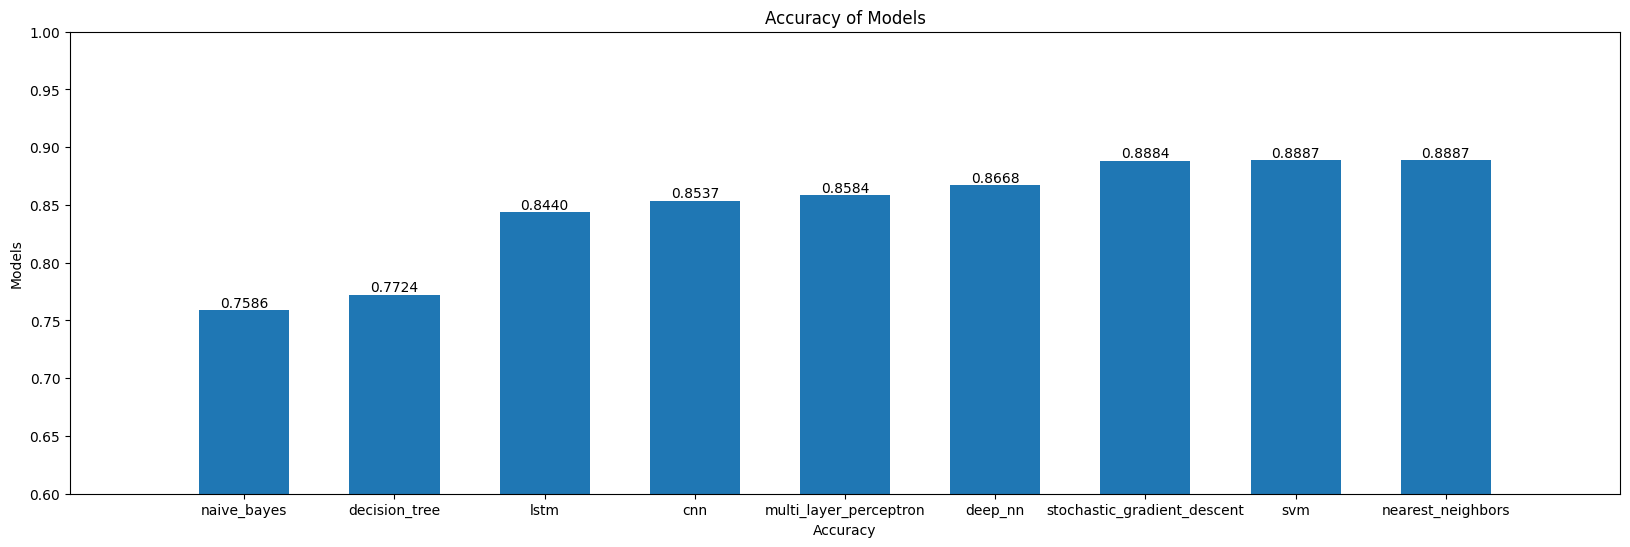

In [42]:
import matplotlib.pyplot as plt

# Sort models based on their accuracy
sorted_models = dict(sorted(models_accuracy.items(), key=lambda x: x[1]))

x_values = list(sorted_models.keys())
y_values = list(sorted_models.values())

fig, ax = plt.subplots()
bars = ax.bar(x_values, y_values, width=0.6, align='center')
ax.set_xmargin(0.1)
ax.set_ymargin(0.1)
fig.set_size_inches(20, 6)
ax.set_ylim(0.6, 1)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, '{:.4f}'.format(height), ha='center', va='bottom')

plt.ylabel('Models')
plt.xlabel('Accuracy')
plt.title('Accuracy of Models')

plt.show()

All accuracy values can be acceptable due to the application of the classification. As it is shown in the chart above, the stochastic gradient descent method has the best accuracy and the naive bayes the least, since it is the simplest method for classification. In my opinion, since sentences in the dataset are not that much complicated, complex models may result in overfit and less accuracy. Simple models are more appropriate for such datasets.


# Conclusion
In this document, nine different methods for sentence classification such as SVM, CNN, LSTM and so on, has been implemented and the accuracy of them has been compared.

For the first six algorithms, the TF-IDF method has been used for word embedding, while for the three other methods, One-Hot encoding has been used.There are other possible embedding techniques such as Word2Vec, GloVe, and ParsBert, which may lead to a better result and higher accuracy. However, there was not enough time to implement them.